## Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import prince
import os

sns.set(style="whitegrid")

/home/amina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Dataset

In [2]:
folder_path = "./wits_en_at-a-glance_allcountries_allyears"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='latin1')
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_13344/3001101229.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [3]:
df.head()

,Reporter,Year,Partner,Product categories,Indicator Type,Indicator,Indicator Value
0,Dominica,2012.0,Trinidad and Tobago,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,6.941986
1,Dominica,2012.0,Jamaica,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,6.007212
2,Dominica,2012.0,St. Kitts and Nevis,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,5.309330
3,Dominica,2012.0,Guyana,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,3.523418
4,Dominica,2012.0,France,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,3.244555


In [4]:
df.columns

Index(['Reporter', 'Year', 'Partner', 'Product categories', 'Indicator Type',
       'Indicator', 'Indicator Value'],
      dtype='object')

In [5]:
df['Indicator Value'] = pd.to_numeric(df['Indicator Value'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [6]:
df.shape

(19722, 7)

### duplication and null values

In [7]:
df.duplicated().sum()

30

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Reporter              599
Year                  102
Partner                 0
Product categories      0
Indicator Type          0
Indicator               0
Indicator Value       159
dtype: int64

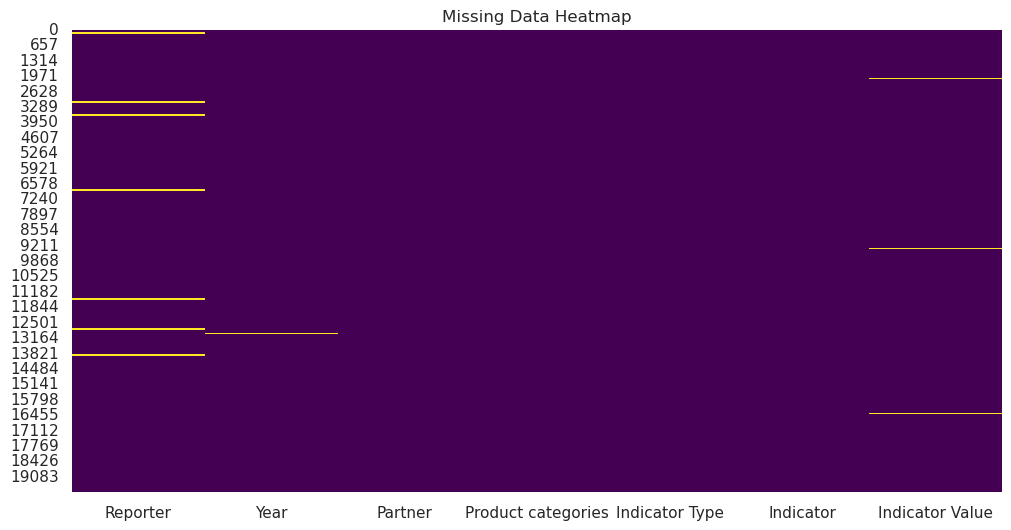

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [12]:
df = df.dropna()

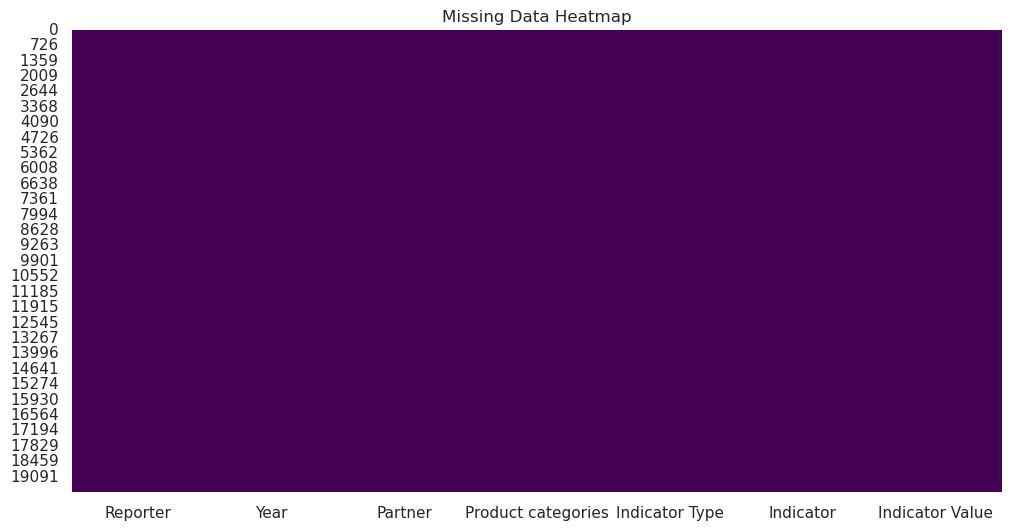

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [14]:
df.shape

(18836, 7)

In [15]:
df['Reporter'].unique()

array(['Dominica', 'European Union', 'El Salvador', "Cote d'Ivoire",
       'Costa Rica', 'Estonia', 'Armenia', 'Syrian Arab Republic',
       'Spain', 'Malta', 'Bermuda', 'Germany', 'Tajikistan', 'Mexico',
       'Albania', 'Nepal', 'Ghana', 'Canada', 'Guinea-Bissau',
       'Iran, Islamic Rep.', 'Cape Verde', 'Chad', 'Gambia, The',
       'New Caledonia', 'Sierra Leone', 'Zimbabwe', 'Sudan', 'Montenegro',
       'Argentina', 'Fm Sudan', 'Montserrat', 'Netherlands', 'Belarus',
       'Slovenia', 'Central African Republic', 'Nicaragua', 'East Timor',
       'Brunei', 'Slovak Republic', 'St. Vincent and the Grenadines',
       'Mozambique', 'St. Kitts and Nevis', 'Azerbaijan', 'Seychelles',
       'Egypt, Arab Rep.', 'Palau', 'Macao', 'Sri Lanka', 'Romania',
       'Nigeria', 'Latvia', 'Lithuania', 'Jamaica', 'Lebanon',
       'Korea, Rep.', 'Australia', 'Senegal', 'Iraq', 'South Africa',
       'Portugal', 'Tunisia', 'Iceland', 'Dominican Republic', 'Moldova',
       'Bosnia and Herzeg

In [16]:
df['Year'].unique()

array([2012., 2019., 2018., 2021., 2013., 2009., 2015., 2014., 2016.,
       2020., 2010., 2006., 2005., 2011., 1995., 2017., 2008., 2003.,
       1998., 2000., 2007.])

In [17]:
df['Partner'].unique()

array(['Trinidad and Tobago', 'Jamaica', 'St. Kitts and Nevis', 'Guyana',
       'France', 'United States', 'Unspecified', 'United Kingdom',
       'China', 'World', '...', 'Switzerland', 'Russian Federation',
       'Guatemala', 'Honduras', 'Nicaragua', 'Costa Rica', 'Mexico',
       'Netherlands', 'Vietnam', 'Belgium', 'Nigeria', 'India', 'Panama',
       'Germany', 'Finland', 'Latvia', 'Sweden', 'Bulgaria',
       'Iran, Islamic Rep.', 'Italy', 'Iraq', 'Turkey', 'Saudi Arabia',
       'Ukraine', 'Portugal', 'Japan', 'Singapore', 'Canada', 'Spain',
       'Poland', 'Kazakhstan', 'Uzbekistan', 'Other Asia, nes',
       'Korea, Rep.', 'Serbia, FR(Serbia/Montenegro)', 'Greece',
       'Argentina', 'United Arab Emirates', 'Indonesia', 'South Africa',
       'Senegal', 'Thailand', 'Mali', 'Guinea-Bissau', 'Togo',
       "Cote d'Ivoire", 'Denmark', 'Malaysia', 'Somalia', 'Ghana',
       'Mozambique', 'Mauritius', 'Egypt, Arab Rep.',
       'Bosnia and Herzegovina', 'Brazil', 'Chile', 'Para

In [18]:
df['Product categories'].unique()

array(['All Products', 'Minerals', 'Stone and Glass', 'Capital goods',
       'Food Products', 'Footwear', 'Consumer goods', 'Vegetable',
       'Textiles and Clothing', 'Intermediate goods', 'Chemicals',
       'Mach and Elec', 'Fuels', 'Metals', 'Plastic or Rubber',
       'Transportation', 'Hides and Skins', 'Miscellaneous', 'Animal',
       'Wood', 'Raw materials', '...'], dtype=object)

In [19]:
df['Indicator Type'].unique()

array(['Export', 'Import', 'Tariff', 'Others', 'Trade Indicator'],
      dtype=object)

In [20]:
df['Indicator'].unique()

array(['Trade (US$ Mil)-Top 5 Export Partner',
       'Trade (US$ Mil)-Top 5 Import Partner', 'Export(US$ Mil)',
       'Import(US$ Mil)', 'Exports (in US$ Mil)', 'Imports (in US$ Mil)',
       'Duty Free Imports (US$ Thousand)', 'No. Of Tariff Agreement',
       'No. Of Import partners', 'No. Of Import products',
       'No. Of Export partners', 'No. Of Export products',
       'Ease of Doing Business Rank', 'Trading Across Borders Rank',
       'Population', 'CPIA Trade Ratings',
       'Partner share(%)-Top 5 Export Partner',
       'Partner share(%)-Top 5 Import Partner', 'Export Product share(%)',
       'Import Product share(%)', 'Weighted Average (%)',
       'World Growth (%)', 'Country Growth (%)', 'Simple Average (%)',
       'Maximum Rate (%)', 'Duty Free Tariff Lines Share (%)',
       'Index of export market penetration',
       'HH Market concentration index',
       'Temporary Trade Barriers in Effect - Weighted Average',
       'Overall Trade Restrictiveness Index -  Ap

### data visualization

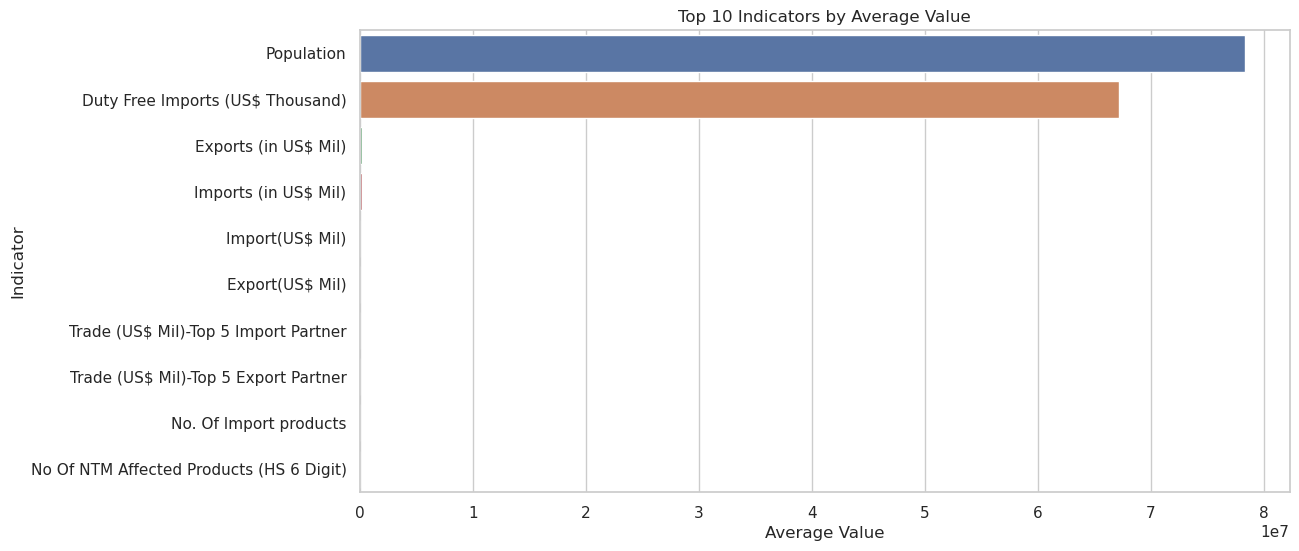

In [21]:
plt.figure(figsize=(12, 6))
indicator_mean = df.groupby('Indicator')['Indicator Value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=indicator_mean.values, y=indicator_mean.index)
plt.title('Top 10 Indicators by Average Value')
plt.xlabel('Average Value')
plt.ylabel('Indicator')
plt.show()

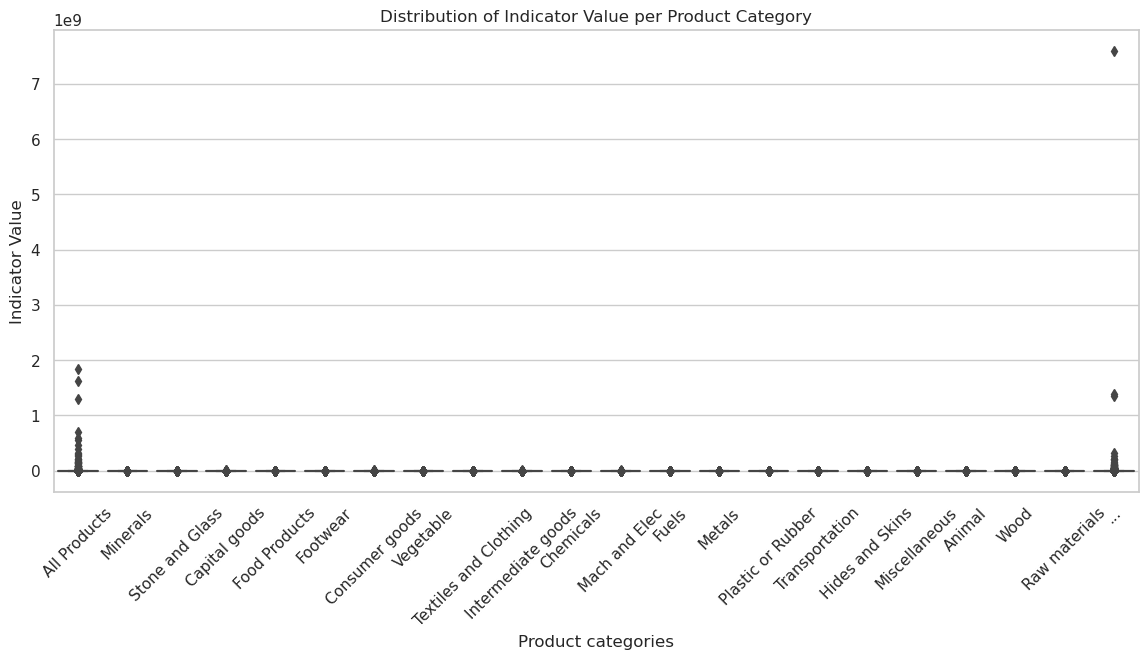

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Product categories', y='Indicator Value')
plt.xticks(rotation=45)
plt.title('Distribution of Indicator Value per Product Category')
plt.show()

/home/amina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


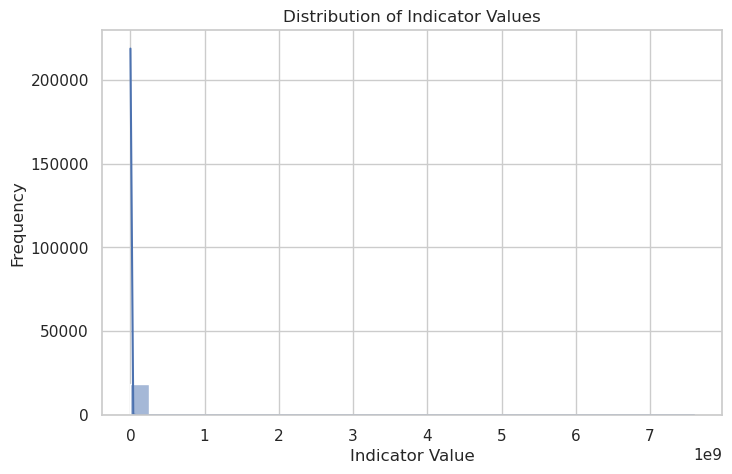

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Indicator Value'], bins=30, kde=True)
plt.title('Distribution of Indicator Values')
plt.xlabel('Indicator Value')
plt.ylabel('Frequency')
plt.show()

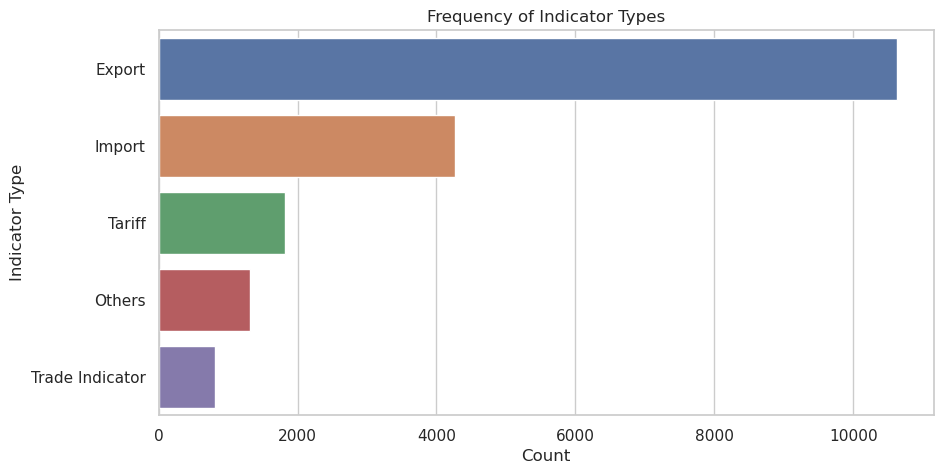

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Indicator Type', order=df['Indicator Type'].value_counts().index)
plt.title('Frequency of Indicator Types')
plt.xlabel('Count')
plt.ylabel('Indicator Type')
plt.show()

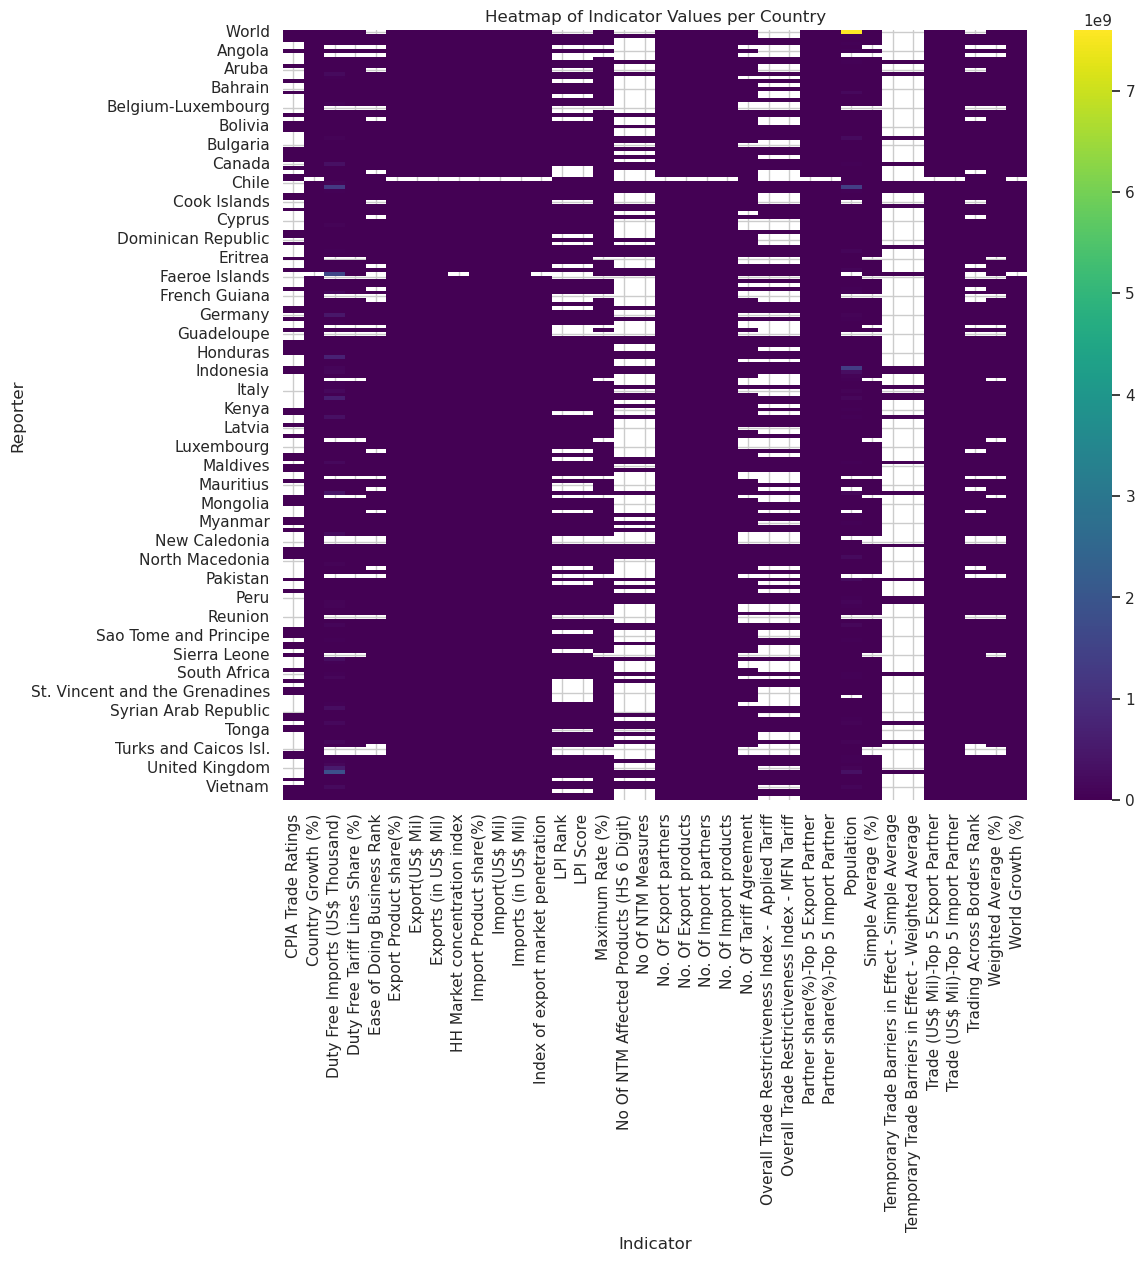

In [25]:
pivot = df.pivot_table(index='Reporter', columns='Indicator', values='Indicator Value', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap='viridis')
plt.title('Heatmap of Indicator Values per Country')
plt.xlabel('Indicator')
plt.ylabel('Reporter')
plt.show()

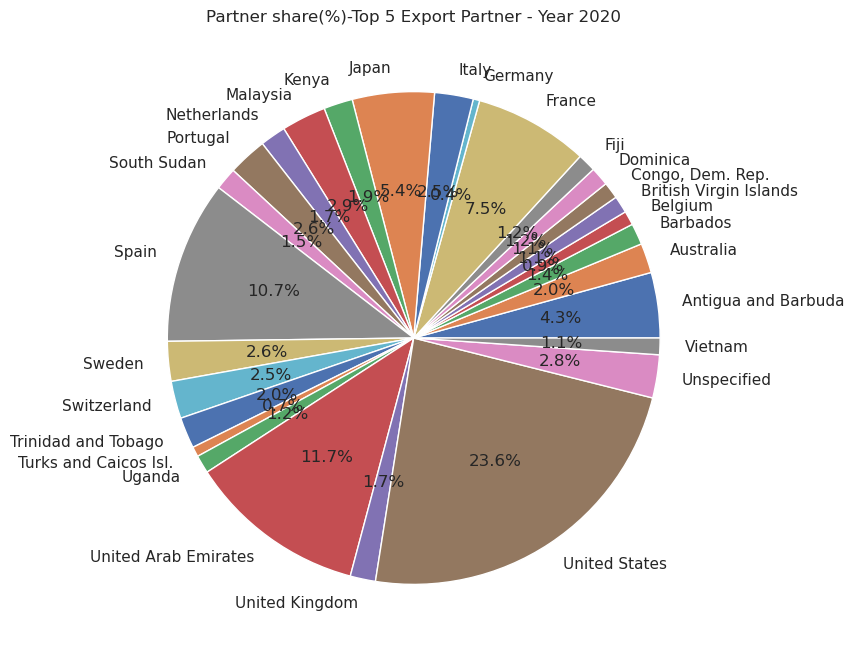

In [26]:
year = 2020  # choose a specific year
df_pie = df[(df['Indicator'] == 'Partner share(%)-Top 5 Export Partner') & (df['Year'] == year)]

df_pie_grouped = df_pie.groupby('Partner')['Indicator Value'].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_pie_grouped, labels=df_pie_grouped.index, autopct='%1.1f%%')
plt.title(f'Partner share(%)-Top 5 Export Partner - Year {year}')
plt.show()

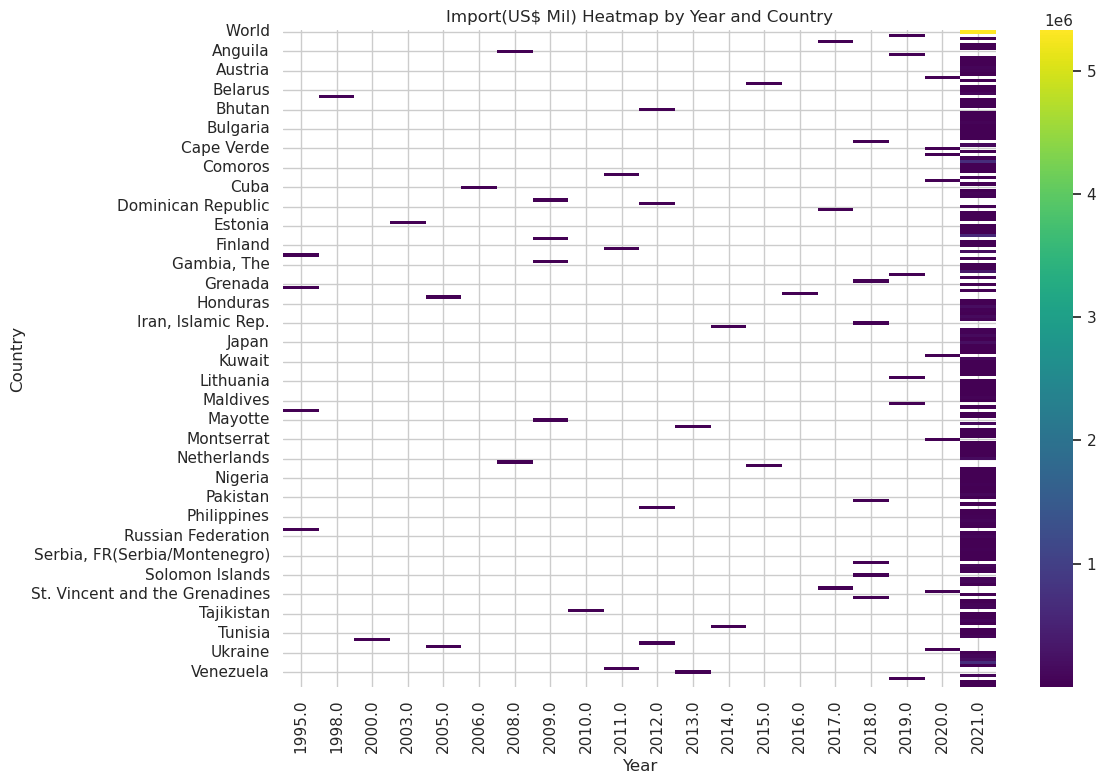

In [27]:
df_heat = df[df['Indicator'] == 'Import(US$ Mil)']
pivot = df_heat.pivot_table(index='Reporter', columns='Year', values='Indicator Value')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='viridis', annot=False)
plt.title(f'Import(US$ Mil) Heatmap by Year and Country')
plt.ylabel('Country')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

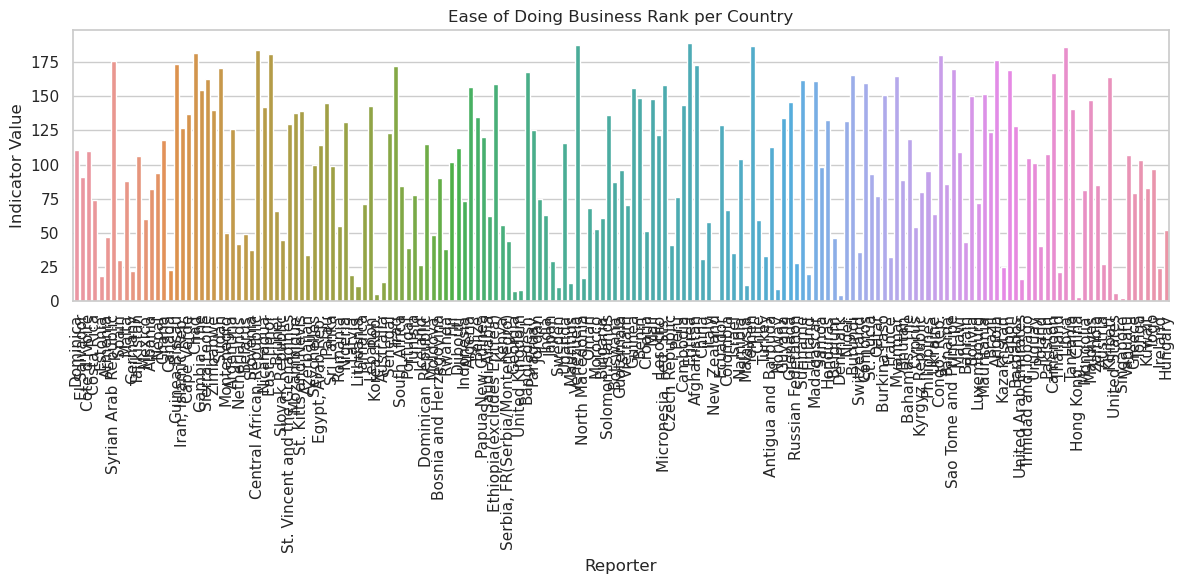

In [28]:
df_bar = df[df['Indicator'] == 'Ease of Doing Business Rank']

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bar, x='Reporter', y='Indicator Value')
plt.title(f'Ease of Doing Business Rank per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Apply CA

In [29]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Reporter', 'Partner', 'Product categories', 'Indicator Type', 'Indicator']

In [30]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Reporter: 204 unique values
Partner: 157 unique values
Product categories: 22 unique values
Indicator Type: 5 unique values
Indicator: 36 unique values


In [31]:
contingency_table = pd.crosstab(df['Product categories'], df['Indicator Type'])

print("Contingency table shape:", contingency_table.shape)

Contingency table shape: (22, 5)


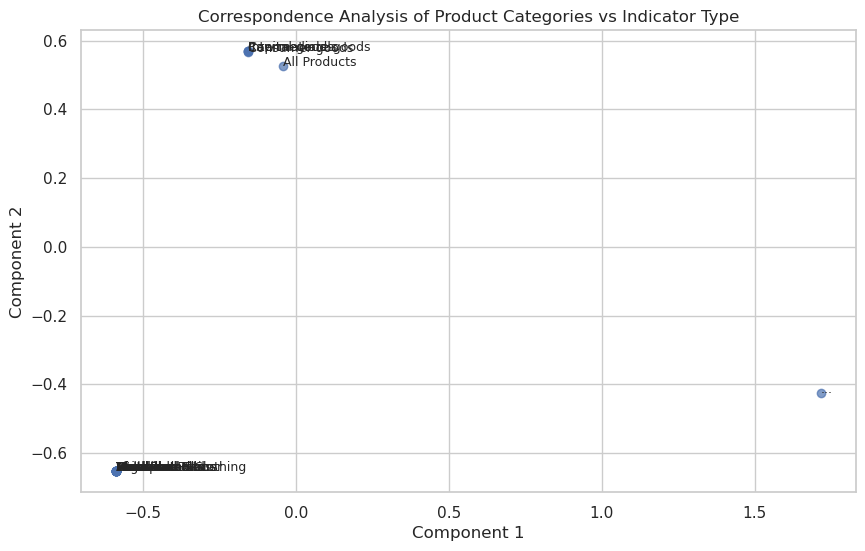

In [32]:
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True)
ca = ca.fit(contingency_table)

row_coords = ca.row_coordinates(contingency_table)

plt.figure(figsize=(10, 6))
plt.scatter(row_coords[0], row_coords[1], alpha=0.7)

for i in range(row_coords.shape[0]):
    label = row_coords.index[i]
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], label, fontsize=9)

plt.title('Correspondence Analysis of Product Categories vs Indicator Type')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [33]:
ca = prince.CA(n_components=2, random_state=42)
ca.fit(contingency_table)

total_inertia = sum(ca.eigenvalues_)
explained_inertia = [eig / total_inertia for eig in ca.eigenvalues_]
print("Explained Inertia:", explained_inertia)

Explained Inertia: [0.6273846200203327, 0.37261537997966726]


In [34]:
explained_inertia = [eig / sum(ca.eigenvalues_) for eig in ca.eigenvalues_]

row_coords = ca.row_coordinates(contingency_table)
row_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(row_coords.shape[1])]
print("\nRow Coordinates (Partner Names):")
print(row_coords.head())  

col_coords = ca.column_coordinates(contingency_table)
col_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(col_coords.shape[1])]
print("\nColumn Coordinates (Export Bins):")
print(col_coords)


Row Coordinates (Partner Names):
                    Component 1 (62.7%)  Component 2 (37.3%)
Product categories                                          
...                            1.716174            -0.424642
All Products                  -0.043015             0.526160
Animal                        -0.588616            -0.652939
Capital goods                 -0.156705             0.568815
Chemicals                     -0.588616            -0.652939

Column Coordinates (Export Bins):
                 Component 1 (62.7%)  Component 2 (37.3%)
Indicator Type                                           
Export                     -0.434305            -0.371278
Import                      0.109961             0.794236
Others                      2.325938            -0.746786
Tariff                      0.086334             0.809993
Trade Indicator             1.133819             0.089266


In [35]:
print("Contingency Table Summary:")
print(contingency_table.shape)  
print(contingency_table.sum())  

Contingency Table Summary:
(22, 5)
Indicator Type
Export             10625
Import              4263
Others              1321
Tariff              1819
Trade Indicator      808
dtype: int64


In [36]:
contingency_table = pd.crosstab(df['Partner'] ,df['Product categories'])

print("Contingency table shape:", contingency_table.shape)

Contingency table shape: (157, 22)


In [37]:
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True)
ca = ca.fit(contingency_table)

row_coords = ca.row_coordinates(contingency_table)

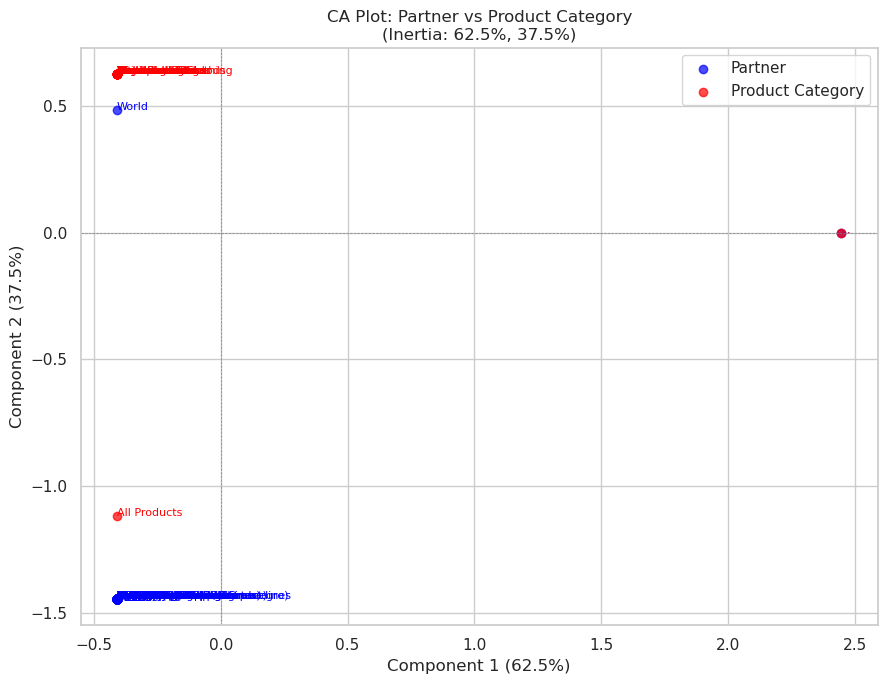

In [ ]:
col_coords = ca.column_coordinates(contingency_table)

# Step 4: Calculate explained inertia
explained_inertia = [eig / sum(ca.eigenvalues_) for eig in ca.eigenvalues_]

# Step 5: Plot
plt.figure(figsize=(12, 7))
plt.scatter(row_coords[0], row_coords[1], c='blue', label='Partner', alpha=0.7)
plt.scatter(col_coords[0], col_coords[1], c='red', label='Product Category', alpha=0.7)

# Add text labels
for i, txt in enumerate(row_coords.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], txt, fontsize=8, color='blue')
for i, txt in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], txt, fontsize=8, color='red')

# Titles and formatting
plt.title(f"CA Plot: Partner vs Product Category\n"
          f"(Inertia: {explained_inertia[0]:.1%}, {explained_inertia[1]:.1%})")
plt.xlabel(f"Component 1 ({explained_inertia[0]:.1%})")
plt.ylabel(f"Component 2 ({explained_inertia[1]:.1%})")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

In [39]:
ca = prince.CA(n_components=2, random_state=42)
ca.fit(contingency_table)

total_inertia = sum(ca.eigenvalues_)
explained_inertia = [eig / total_inertia for eig in ca.eigenvalues_]
print("Explained Inertia:", explained_inertia)

Explained Inertia: [0.625089210696313, 0.37491078930368693]


In [40]:
explained_inertia = [eig / sum(ca.eigenvalues_) for eig in ca.eigenvalues_]

row_coords = ca.row_coordinates(contingency_table)
row_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(row_coords.shape[1])]
print("\nRow Coordinates (Partner Names):")
print(row_coords.head())  

col_coords = ca.column_coordinates(contingency_table)
col_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(col_coords.shape[1])]
print("\nColumn Coordinates (Export Bins):")
col_coords


Row Coordinates (Partner Names):
                     Component 1 (62.5%)  Component 2 (37.5%)
Partner                                                      
...                             2.447292        -6.706529e-16
American Samoa                 -0.408615        -1.444573e+00
Angola                         -0.408615        -1.444573e+00
Antigua and Barbuda            -0.408615        -1.444573e+00
Argentina                      -0.408615        -1.444573e+00

Column Coordinates (Export Bins):


,Component 1 (62.5%),Component 2 (37.5%)
Product categories,,
...,2.447292,-3.320599e-16
All Products,-0.408615,-1.118748e+00
Animal,-0.408615,6.256216e-01
Capital goods,-0.408615,6.256216e-01
Chemicals,-0.408615,6.256216e-01
Consumer goods,-0.408615,6.256216e-01
Food Products,-0.408615,6.256216e-01
Footwear,-0.408615,6.256216e-01
Fuels,-0.408615,6.256216e-01


In [41]:
print("Contingency Table Summary:")
print(contingency_table.shape)
contingency_table.sum()

Contingency Table Summary:
(157, 22)


Product categories
...                      2695
All Products             5789
Animal                    402
Capital goods             994
Chemicals                 400
Consumer goods            996
Food Products             404
Footwear                  390
Fuels                     386
Hides and Skins           390
Intermediate goods        994
Mach and Elec             400
Metals                    404
Minerals                  390
Miscellaneous             406
Plastic or Rubber         400
Raw materials             994
Stone and Glass           398
Textiles and Clothing     402
Transportation            394
Vegetable                 404
Wood                      404
dtype: int64

In [42]:
contingency_table = pd.crosstab(df['Reporter'], df['Partner'])

print("Contingency table shape:", contingency_table.shape)

Contingency table shape: (204, 157)


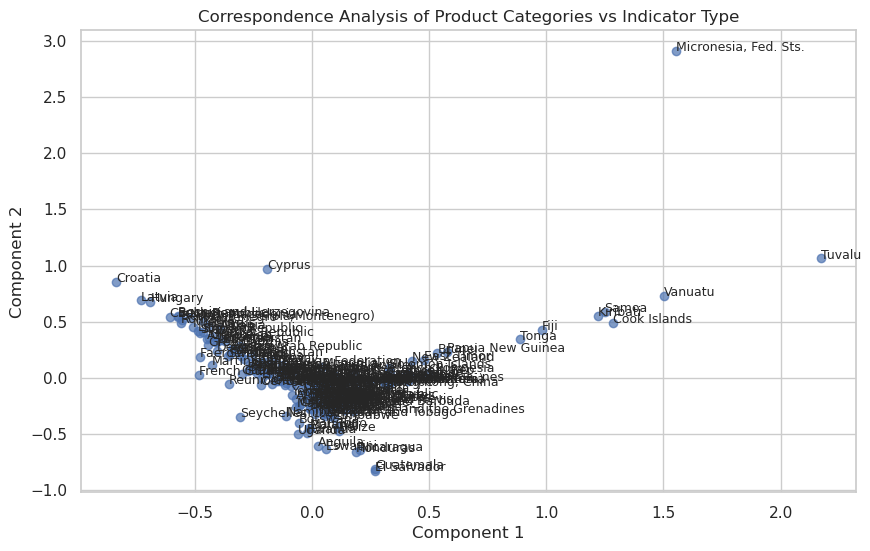

In [43]:
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True)
ca = ca.fit(contingency_table)

row_coords = ca.row_coordinates(contingency_table)

plt.figure(figsize=(10, 6))
plt.scatter(row_coords[0], row_coords[1], alpha=0.7)

for i in range(row_coords.shape[0]):
    label = row_coords.index[i]
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], label, fontsize=9)

plt.title('Correspondence Analysis of Product Categories vs Indicator Type')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [44]:
ca = prince.CA(n_components=2, random_state=42)
ca.fit(contingency_table)

total_inertia = sum(ca.eigenvalues_)
explained_inertia = [eig / total_inertia for eig in ca.eigenvalues_]
print("Explained Inertia:", explained_inertia)

Explained Inertia: [0.5294248940172102, 0.4705751059827898]


In [45]:
explained_inertia = [eig / sum(ca.eigenvalues_) for eig in ca.eigenvalues_]

row_coords = ca.row_coordinates(contingency_table)
row_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(row_coords.shape[1])]
print("\nRow Coordinates (Partner Names):")
print(row_coords.head())  

col_coords = ca.column_coordinates(contingency_table)
col_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(col_coords.shape[1])]
print("\nColumn Coordinates (Export Bins):")
col_coords


Row Coordinates (Partner Names):
             Component 1 (52.9%)  Component 2 (47.1%)
Reporter                                             
 World                  0.091135             0.022189
Afghanistan            -0.068282            -0.184467
Albania                -0.390634             0.430499
Algeria                -0.198289             0.042757
Andorra                -0.264881             0.086059

Column Coordinates (Export Bins):


,Component 1 (52.9%),Component 2 (47.1%)
Partner,,
...,0.043035,-0.040991
American Samoa,3.438895,1.719642
Angola,-0.249010,-0.211844
Antigua and Barbuda,0.110880,-0.773330
Argentina,0.250198,-0.596848
...,...,...
Venezuela,-0.356068,0.347042
Vietnam,1.102327,0.120586
World,-0.011801,0.000994


In [46]:
print("Contingency Table Summary:")
print(contingency_table.shape)  
contingency_table.sum()

Contingency Table Summary:
(204, 157)


Partner
...                     2695
American Samoa             2
Angola                     2
Antigua and Barbuda       10
Argentina                 22
                       ...  
Venezuela                  4
Vietnam                   18
World                  12087
Zambia                     6
Zimbabwe                   2
Length: 157, dtype: int64